<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/torch/1.simpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. sin 함수 학습하기**

**메모**

```python
torch.linspace(시작, 끝, n): 시작에서 끝까지 n개로 나눈 점
torch.randn(): 평균이 0이고 분산이 1인 정규분포를 따르는 랜덤 수
    # ()안에 n: n개의 랜덤수
    # ()안에 행렬: 랜덤수로 채운 행렬
```

In [1]:
import math
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
y_random = a*x**3 + b*x**2 + c*x + d

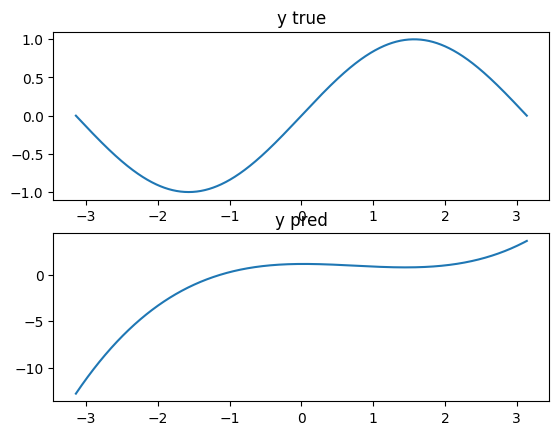

In [2]:
plt.subplot(2, 1, 1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title('y pred')
plt.plot(x, y_random)

plt.show()

In [3]:
lr = 1e-6
epochs = 2000

for epoch in range(epochs):
    y_pred = a*x**3 + b*x**2 + c*x + d
    loss = (y_pred - y).pow(2).sum().item()
    if epoch % 100 == 0:
        print(f"epoch{epoch+1} loss:{loss}")

    # 손실함수를 각각 a, b, c, d로 편미분한 값
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= lr * grad_a
    b -= lr * grad_b
    c -= lr * grad_c
    d -= lr * grad_d

epoch1 loss:11756.6435546875
epoch101 loss:853.7136840820312
epoch201 loss:709.5172729492188
epoch301 loss:590.5000610351562
epoch401 loss:491.701416015625
epoch501 loss:409.6637878417969
epoch601 loss:341.5251770019531
epoch701 loss:284.91546630859375
epoch801 loss:237.871337890625
epoch901 loss:198.76611328125
epoch1001 loss:166.25119018554688
epoch1101 loss:139.20913696289062
epoch1201 loss:116.71283721923828
epoch1301 loss:97.99349975585938
epoch1401 loss:82.41300201416016
epoch1501 loss:69.4417724609375
epoch1601 loss:58.64021301269531
epoch1701 loss:49.64324188232422
epoch1801 loss:42.14759826660156
epoch1901 loss:35.90126419067383


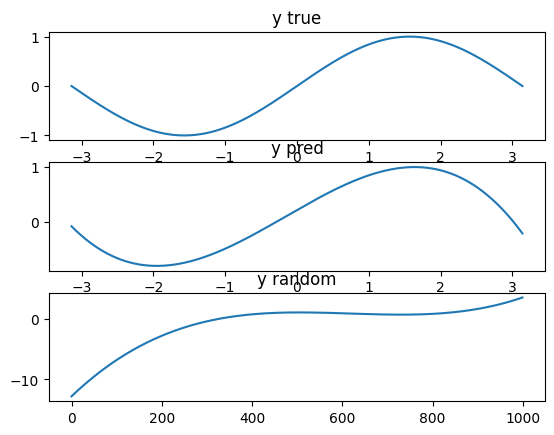

In [4]:
plt.subplot(3, 1, 1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(3, 1, 2)
plt.title('y pred')
plt.plot(x, y_pred)

plt.subplot(3, 1, 3)
plt.title('y random')
plt.plot(y_random)

plt.show()

# **2. 보스턴 주택 가격 예측**

**메모**
- 배치: 데이터 묶음 단위
- 에포크: 배치 크기 단위로 전체 데이터 모두를 학습하는 단위
- 이터레이션: 1에포크를 완성하는데 필요한 배치의 반복 횟수

In [5]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame(data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX' ,'RM' ,'AGE',\
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['target'] = target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

In [8]:
X = df.iloc[:, :13].values
Y = df['target'].values

epochs = 200
batch_size = 100
lr = 0.001
optim = Adam(model.parameters(), lr=lr)

for epoch in range(epochs):
    for i in range(len(X)//batch_size):
        start = i*batch_size
        end = start + batch_size

        x = torch.FloatTensor(X[start:end])
        y = torch.FloatTensor(Y[start:end])

        optim.zero_grad()
        preds = model(x)
        loss = nn.MSELoss()(preds, y)
        loss.backward()
        optim.step()

    if epoch % 20 == 0:
        print(f"epoch{epoch} loss:{loss.item()}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch0 loss:293.5081787109375
epoch20 loss:39.869205474853516
epoch40 loss:39.53755569458008
epoch60 loss:39.119991302490234
epoch80 loss:38.97346115112305
epoch100 loss:38.73964309692383
epoch120 loss:38.52064514160156
epoch140 loss:38.39991760253906
epoch160 loss:38.408226013183594
epoch180 loss:38.361637115478516


In [9]:
prediction = model(torch.FloatTensor(x[0, :13]))
real = Y[0]
print(f"prediction: {prediction}, real: {real}")

prediction: tensor([19.7051], grad_fn=<ViewBackward0>), real: 24.0


# **3. mnist**

60000
10000


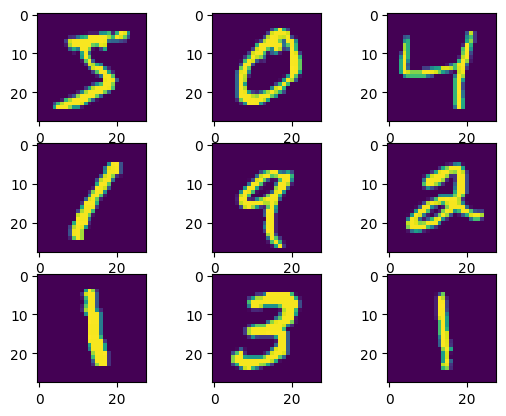

In [11]:
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

training_data = MNIST(root='./', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./', train=False, download=True, transform=ToTensor())

print(len(training_data))
print(len(test_data))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])
plt.show()

In [15]:
BATCH_SIZE=32
LEARNING_RATE=1e-3
EPOCHS=20

In [14]:
from torch.utils.data.dataloader import DataLoader

BATCH_SIZE=32

# class가 골고루 나오도록 해서 훈련이 잘 되도록
train_loader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)
# 가중치의 변화가 이루어지지 않으므로 순서 상관 없음
test_loader = DataLoader(test_data, BATCH_SIZE, shuffle=False)

In [16]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model.to(device)
optim = Adam(model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
    for data, label in train_loader:
        optim.zero_grad()
        data = torch.reshape(data, (-1, 784)).to(device)
        preds = model(data)

        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()

    print(f"epoch:{epoch+1} loss:{loss.item()}")

torch.save(model.state_dict(), "MNIST.pth")

epoch:1 loss:0.18680259585380554
epoch:2 loss:0.1267220377922058
epoch:3 loss:0.049461424350738525
epoch:4 loss:0.05017347261309624
epoch:5 loss:0.009595939889550209
epoch:6 loss:0.07407486438751221
epoch:7 loss:0.13039155304431915
epoch:8 loss:0.0026187708135694265
epoch:9 loss:0.16313695907592773
epoch:10 loss:0.0013784973416477442
epoch:11 loss:0.005965632852166891
epoch:12 loss:0.006167059298604727
epoch:13 loss:0.0008385827532038093
epoch:14 loss:0.00034415198024362326
epoch:15 loss:0.019997194409370422
epoch:16 loss:0.003257043892517686
epoch:17 loss:0.01143380906432867
epoch:18 loss:0.020106643438339233
epoch:19 loss:0.12590517103672028
epoch:20 loss:0.000568549323361367


In [19]:
# 모든 가중치들이 gpu에 저장되어있기 때문에
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0 # 분류 성공 개수

with torch.no_grad():
    for data, label in test_loader:
        # test 데이터 gpu로 이동
        data = torch.reshape(data, (-1, 784)).to(device)

        output = model(data)
        preds = output.data.max(1)[1] # 예측값

        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr

    print(f"accuracy: {num_corr/len(test_data)}")

accuracy: 0.9743
